In [2]:
#Import necessary packages
import keras
import numpy as np
import math
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, Reshape, LSTM
import matplotlib.pyplot as plt
import pickle as cPickle


# Creating a CLDNN

Run the code in the block below 'as is.' After executing, the high SNR RadioML training and testing data will be stored in the arrays X_train and X_test, respectively. Their respective one-hot labels will be stored in Y_train and Y_test. 

In [ ]:
#Download RML 2016.10b dataset and untar file
!wget http://opendata.deepsig.io/datasets/2016.10/RML2016.10b.tar.bz2
!tar -xvjf RML2016.10b.tar.bz2

#Extract high SNR data and obtain their corresponding lables 
Xd = cPickle.load(open("RML2016.10b.dat",'rb'), encoding='latin1')
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        if snr > 0:
            X.append(Xd[(mod,snr)])
            for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

np.random.seed(2016)
n_examples = X.shape[0]
n_train = n_examples * 0.8
n_train = int(n_train)
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy = list(yy)
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1
Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

#Re-shape data to appropriate dimensions 
X_train = X_train.reshape(432000, 2, 128, 1)
X_test = X_test.reshape(108000, 2, 128, 1)

RML2016.10b.dat
LICENSE.TXT


In [ ]:
num_classes=10
#Create and train model architecture
def cldnn():
    model = Sequential()
    
    # Bild a 2D Convolutional layer with 256 feature maps and a 3x3 filter
    model.add(Conv2D(256 , (1,3), activation = 'relu', input_shape = (2,128,1)))
    
    # Randomly freezes 20% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.2))
    
    # Add a 2D Convolutional layer with 
    model.add(Conv2D(256, (2,3), activation = 'relu' ))
    
    # Add a 2D Convolutional layer with 
    model.add(Conv2D(80, (1,3), activation = 'relu' ))

    # Randomly freezes 20% of weights in previous layer to prevent over fitting
    model.add(Dropout(0.2))

    # Add a 2D Convolutional layer with 
    model.add(Conv2D(80, (1,3), activation = 'relu' ))

    # Reshape
    model.add(Reshape((120,80)))

    # LSTM layer
    model.add(LSTM(50))
    
    # Add Dense layer with 128 perceptrons
    model.add(Dense(128, activation = "relu", kernel_initializer = "normal"))
    
    #Output layer with num_classes perceptrons
    model.add(Dense(num_classes, activation = "softmax"))
    
    return model

#Create instance of CNN model graph
CLDNN_model = cldnn()

#Compile model using an appropriate loss and optimizer algorithm
CLDNN_model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

#Train the model and assign training meta-data to a variable
CLDNN_model_mdata = CLDNN_model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs =70, batch_size = 4096, shuffle = True)

#Print accuracy of model on testing set after training 
scores = CLDNN_model.evaluate(X_test, Y_test)

print("Accuracy: %.2f%%" %(scores[1]*100))

Epoch 1/70
106/106 [==============================] - 189s 2s/step - loss: 2.0867 - accuracy: 0.1681 - val_loss: 1.9451 - val_accuracy: 0.1972
Epoch 2/70
106/106 [==============================] - 168s 2s/step - loss: 1.8618 - accuracy: 0.2461 - val_loss: 1.6819 - val_accuracy: 0.2936
Epoch 3/70
106/106 [==============================] - 169s 2s/step - loss: 1.6469 - accuracy: 0.3119 - val_loss: 1.5358 - val_accuracy: 0.3374
Epoch 4/70
106/106 [==============================] - 169s 2s/step - loss: 1.4730 - accuracy: 0.3706 - val_loss: 1.2875 - val_accuracy: 0.4466
Epoch 5/70
106/106 [==============================] - 169s 2s/step - loss: 1.2665 - accuracy: 0.4354 - val_loss: 1.0661 - val_accuracy: 0.4791
Epoch 6/70
106/106 [==============================] - 168s 2s/step - loss: 1.0717 - accuracy: 0.4873 - val_loss: 0.9437 - val_accuracy: 0.5250
Epoch 7/70
106/106 [==============================] - 169s 2s/step - loss: 0.9834 - accuracy: 0.5304 - val_loss: 0.8318 - val_accuracy: 0.6129

#Finding the number of active neurons in relu case

In [ ]:
# Extract the Model Outputs for all the Layers
Model_Outputs = [layer.output for layer in model.layers]
# Create a Model with Model Input as Input and the Model Outputs as Output
Activation_Model = Model(model.input, Model_Outputs)
Activations = Activation_Model.predict(Image_Tensor)

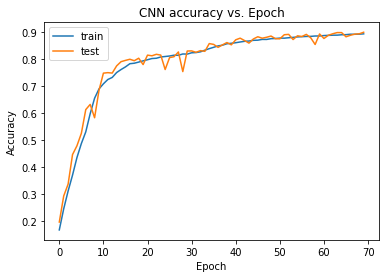

In [ ]:
#Plot accuracy vs epoch
plt.plot(CLDNN_model_mdata.history['accuracy'])
plt.plot(CLDNN_model_mdata.history['val_accuracy'])
plt.title('CNN accuracy vs. Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

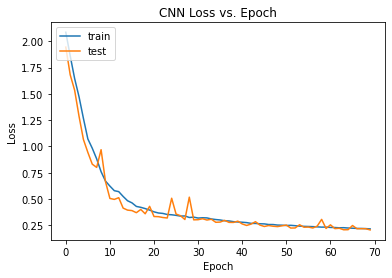

In [ ]:
#Plot loss vs epoch
plt.plot(CLDNN_model_mdata.history['loss'])
plt.plot(CLDNN_model_mdata.history['val_loss'])
plt.title('CNN Loss vs. Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()